In [ ]:
#AUX: línea necesaria para instalación en Google Colab
#!pip install -U scikit-image
!pip install ipython-autotime

In [ ]:
#AUX: montar archivos y carpetas desde Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#tiempo de ejecución
%load_ext autotime

#dataframes y arrays
import pandas as pd
import numpy as np

#estadística
import scipy.stats as stats

#gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#gama matplotlib para facilitar escritura de código
%matplotlib inline

#análisis normalidad
import statsmodels.api as sm
import statsmodels.formula.api as smf

#análisis de dataframe
import missingno as msno

#análisis factorial
#import factor_analyzer as factor
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

#clustering
from sklearn.cluster import KMeans, MiniBatchKMeans

#quitar warnings
import warnings
warnings.filterwarnings(action = "ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


time: 1.47 s (started: 2021-09-19 14:28:41 +00:00)


In [ ]:
image_1 = "/content/drive/MyDrive/ADL/2_Introducción a DS/2_Desafíos & Prueba/1_Drive_oficial/D14_Dimensionalidad y agrupación II/album_covers/backstreet-boys-millenium.jpg"

time: 951 µs (started: 2021-09-19 19:50:58 +00:00)




###**Desafío 1: Preparación del ambiente de trabajo**

Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de
carátulas de álbumes.

* Las imágenes se encuentran en una carpeta con el nombre ​album_covers. Cada imagen tiene la siguiente nomenclatura: ​artista-nombre-​del​-album.jpg​.
> El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores.

* Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
1. Comencemos por incluír las librerías clásicas: ​pandas​, ​numpy​ y ​matplotlib.pyplot​.
2. sklearn.cluster.KMeans, para extraer los principales componentes de una matriz
numérica.
3. skimage.io : Para poder ingresar y leer imágenes.

Comentarios:
1. Los import necesarios utilizados anteriormente están en la tercera celda.
2. Se agrega a los import ya conocidos y a los especificados en la lectura:

In [ ]:
import skimage.io as skim

time: 117 ms (started: 2021-09-19 14:28:55 +00:00)


###**Desafío 2: Importación de imágenes**
* Comencemos por ingresar una imagen a nuestro ambiente de trabajo. Para ello ocuparemos ​io.imread​. ¿Qué devuelve?
* Para visualizar la imágen en el notebook, ocupe ​io.imshow​.

In [ ]:
skim.imread(image_1)

array([[[156, 188, 203],
        [174, 210, 224],
        [192, 232, 244],
        ...,
        [194, 231, 237],
        [194, 231, 237],
        [194, 231, 237]],

       [[153, 185, 200],
        [171, 207, 221],
        [190, 230, 242],
        ...,
        [191, 228, 234],
        [193, 230, 236],
        [194, 231, 237]],

       [[150, 183, 200],
        [170, 206, 220],
        [188, 230, 242],
        ...,
        [190, 227, 235],
        [193, 230, 238],
        [196, 233, 241]],

       ...,

       [[152, 213, 198],
        [140, 200, 188],
        [141, 203, 192],
        ...,
        [164, 215, 218],
        [162, 210, 214],
        [170, 215, 220]],

       [[152, 207, 201],
        [140, 197, 190],
        [141, 201, 193],
        ...,
        [160, 211, 214],
        [159, 207, 211],
        [170, 215, 220]],

       [[158, 210, 208],
        [146, 198, 196],
        [148, 203, 200],
        ...,
        [165, 216, 219],
        [169, 217, 221],
        [182, 227, 232]]

time: 15.4 ms (started: 2021-09-19 19:56:39 +00:00)


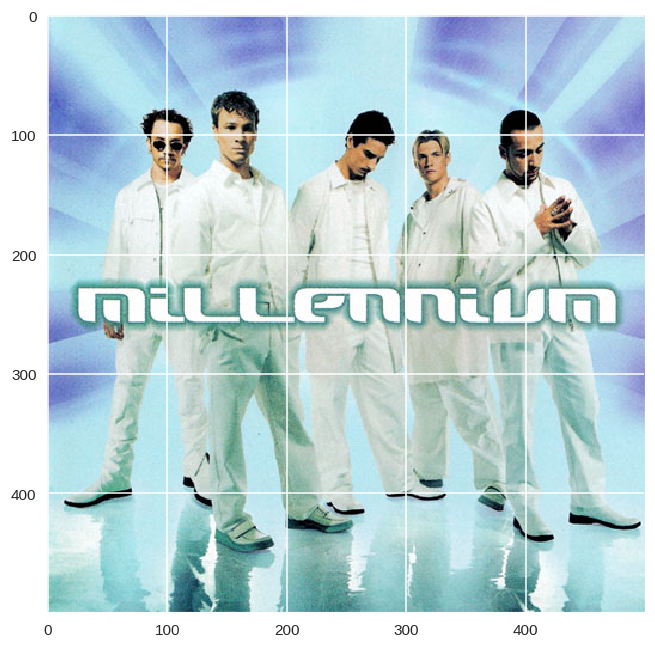

time: 476 ms (started: 2021-09-19 19:56:15 +00:00)


In [ ]:
skim.imshow(image_1)

Comentarios:

1. El método <code>imread</code> permite visualizar el array de la imagen importada.
2. Por otro lado, el método <code>imshow</code> muestra la imagen en pantalla. En ambos casos, se observa la misma información, solo cambia el formato mostrado.
3. Antes de realizar 1 y 2,  es necesario haber ingresado previamente como variable la imagen, que en este caso es una dirección en una carpeta de Google Drive.

###**Desafío 3: Preprocesamiento de imágenes y KMeans**
* Con la representación numérica de la imagen, vamos a extraer la altura, el ancho y la cantidad de canales mediante ​shape​.

* Posteriormente redimensionaremos la imágen con reshape.
* Partamos por inicializar nuestro algoritmo ​KMeans​ con un ​k=​8​, ¿Qué significa esto?
* Vuelva a implementar el mismo algoritmo con ​MiniBatchKMeans
​* ¿Qué diferencia
existe con ​KMeans​?

Comentarios:
1. Se revisa el tamaño de la imagen con el método <code>.shape</code>.
2. Se aplica el método <code>.reshape()</code> a la imagen para modificar su estructura, conservando la información del array.
3. Como formalidad se incorpora una variable que hace alusión a la matriz de entrenamiento.
4. Se aplica la reducción de dimensionalidad por clustering con el método <code>KMeans</code> con uso de una semilla pseudoaleatoria, con 8 clusters y pidiendo al método que reinicie 30 veces (más que las solicitadas por defecto en el método, 10) para mejorar la precisión.
5. Para revisar las etiquetas y comparar con el método siguiente, se pide la proporción asignada por cada etiqueta (o cluster) y además la inercia asociada.
6. Se aplica el método <code>MiniBatchKMeans</code> con la misma semilla, número de reinicios y clusters, considerando un número de lotes alto.

In [ ]:
skim.imread(image_1).shape

(500, 500, 3)

time: 21 ms (started: 2021-09-19 17:59:50 +00:00)


In [ ]:
image_1_redim = skim.imread(image_1).reshape(-3, 3)

time: 13.2 ms (started: 2021-09-19 17:59:54 +00:00)


In [ ]:
X_mat_image_1 = image_1_redim

time: 838 µs (started: 2021-09-19 17:59:55 +00:00)


In [ ]:
kmeans_image_1 = KMeans(n_clusters = 8,
                        random_state = 3748,
                        n_init = 30)

results_kmeans_image_1 = kmeans_image_1.fit_predict(X_mat_image_1)

pd.Series(kmeans_image_1.labels_).value_counts("%")

5    0.271884
1    0.165552
7    0.164216
0    0.133732
2    0.123008
4    0.061604
6    0.057260
3    0.022744
dtype: float64

time: 16 s (started: 2021-09-19 14:29:15 +00:00)


In [ ]:
kmeans_image_1.inertia_

137335087.1234654

time: 6.52 ms (started: 2021-09-19 14:29:34 +00:00)


In [ ]:
batchkmeans_image_1 = MiniBatchKMeans(n_clusters = 8,
                                      random_state = 3748,
                                      batch_size = 100,
                                      n_init = 30)

results_mbkmeans_image_1 = batchkmeans_image_1.fit_predict(X_mat_image_1)

pd.Series(batchkmeans_image_1.labels_).value_counts("%")

1    0.269716
4    0.161688
3    0.161604
5    0.132032
0    0.125132
6    0.067296
7    0.058992
2    0.023540
dtype: float64

time: 1.78 s (started: 2021-09-19 20:30:18 +00:00)


In [ ]:
batchkmeans_image_1.inertia_

137627568.0482873

time: 5.77 ms (started: 2021-09-19 14:29:41 +00:00)


Comentarios:
1. <code>KMeans</code> y <code>MiniBatchKMeans</code> arrojan resultados semejantes si se revisan las proporciones de las clasificaciones que realiza cada algoritmo. Por otro lado, la inercia es ligeramente menor en el algoritmo <code>KMeans</code>. En general, con datasets pequeños se observan pérdidas de información menores [1, 2].
2. Respecto a los tiempos de ejecución de cada uno, <code>MiniBatchKMeans</code> utiliza tiempos extensos iguales o mayores a <code>KMeans</code> si se solicitan pocos lotes. Por ejemplo, al tener <code>batch_size = 5</code> el tiempo de ejecución fue de 17.4 segundos, pero al subirlo a <code>batch_size = 100</code> este baja a a 1.78 segundos. Dada la cantidad de veces que se inicia con distintos centroides en ambos casos, el tiempo de ejecución de <code>KMeans</code> es alto (16 segundos).
3. Se continuará el análisis con los resultados de <code>KMeans</code>.

###**Desafío 4: Extracción de valores**
* Ahora extraemos las etiquetas predichas con ​labels_. Hasta el momento las
etiquetas hacen referencia a cada centroide. Para imputar sentido en estos, debemos extraer los valores de los centroides.
* Para extraer los centroides (valores característicos), utilizamos el atributo
cluster_centers_​.
* Con las etiquetas, generamos un conteo de ocurrencia con ​np.unique​. Para extraer
el conteo, debemos implementar la opción ​return_counts=​True​.

Comentarios:
1. Las etiquetas o clusters ya fueron extraídos en el desafío anterior, ya que esta información fue utilizada para comparar los resultados entre los métodos <code>KMeans</code> y <code>MiniBatchKMeans</code>.
2. Se aplica el método <code>cluster_centers_.</code> para tener las coordenadas de cada cluster. Por otro lado, se aplica el método <code>no.unique</code> para conocer las proporciones en las cuales se presenta casa etiqueta en el array de la imagen.

In [ ]:
kmeans_image_1.cluster_centers_

array([[233.95502226, 240.69731927, 238.77152506],
       [159.36751683, 197.28137442, 223.46015009],
       [143.47686241, 180.81307437, 168.95440918],
       [ 20.32646955,  23.5686378 ,  25.99208025],
       [ 91.87282071, 134.12717929, 125.05204268],
       [188.40150657, 229.50902617, 238.35295502],
       [128.84967868, 146.74392288, 210.1605197 ],
       [197.62416303, 210.18450975, 201.43780283]])

time: 4.51 ms (started: 2021-09-19 18:35:31 +00:00)


In [ ]:
np.unique(kmeans_image_1.labels_, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([33433, 41388, 30752,  5686, 15401, 67971, 14315, 41054]))

time: 14.6 ms (started: 2021-09-19 14:29:51 +00:00)


###**Desafío 5: Conversión rgb a hex**
* Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con ​map​ por cada centroide.

##**Desafío 6: Definición de base**
* Ahora generamos un DataFrame con las siguientes variables:
1. El color ​hex​.
2. La ocurrencia del color en cada pixel ​count​.
3. El porcentaje de ocurrencia de cada color respecto a ​cluster_centers_​.
4. Posteriormente ordenaremos los colores de forma descendente por el porcentaje de
ocurrencia.

Comentarios:
1. Se escoge un método alternativo que permitirá ver toda la información resumida: se crea una Dataframe con las etiquetas y resultados de la aplicación de <code>KMeans</code>.
2. Se incorpora el método <code>to_hex</code> de <code>Matplotlib</code> para transformar la información de los colores en RGB a Hexadecimal, incorporando tal información a un diccionario, y posteriormente al DataFrame <code>centroid_model</code>.

In [ ]:
centroid_model = pd.DataFrame(kmeans_image_1.cluster_centers_ / 255).rename(columns = {
                                                                                0 : "Red",
                                                                                1 : "Green",
                                                                                2 : "Blue"    
                                                                                })

centroid_model["Cluster"] = np.unique(kmeans_image_1.labels_, return_counts = True)[0]
centroid_model["Nº points"] = np.unique(kmeans_image_1.labels_, return_counts = True)[1]
centroid_model["%"] = pd.Series(batchkmeans_image_1.labels_).value_counts("%")

time: 27.3 ms (started: 2021-09-19 15:48:36 +00:00)


In [ ]:
centroid_model.reindex(columns = [
                                  "Cluster",
                                  "Red",
                                  "Green",
                                  "Blue",
                                  "Nº points",
                                  "%"
                                  ]).reset_index(drop = True, inplace = True)

centroid_model.sort_values(by = "%", ascending = False, inplace = True)

time: 6.75 ms (started: 2021-09-19 15:48:39 +00:00)


In [ ]:
from matplotlib.colors import to_hex

standardized_clusters = kmeans_image_1.cluster_centers_ / 255
hex_colors = []

for i in range(standardized_clusters.shape[0]):
  hex_colors.append(to_hex(standardized_clusters[i, :]))

time: 4.56 ms (started: 2021-09-19 15:48:43 +00:00)


In [ ]:
hex_dict = {
            0 : "#eaf1ef",
            1 : "#9fc5df",
            2 : "#8fb5a9",
            3 : "#14181a",
            4 : "#5c867d",
            5 : "#bce6ee",
            6 : "#8193d2",
            7 : "#c6d2c9",
            }

time: 3.52 ms (started: 2021-09-19 15:48:46 +00:00)


In [ ]:
centroid_model["Hex"] = centroid_model["Cluster"].map(hex_dict)

centroid_model

,Red,Green,Blue,Cluster,Nº points,%,Hex
1,0.624971,0.773652,0.876314,1,41388,0.269716,#9fc5df
4,0.360286,0.525989,0.490400,4,15401,0.161688,#5c867d
3,0.079712,0.092426,0.101930,3,5686,0.161604,#14181a
5,0.738829,0.900035,0.934717,5,67971,0.132032,#bce6ee
0,0.917471,0.943911,0.936359,0,33433,0.125132,#eaf1ef
6,0.505293,0.575466,0.824159,6,14315,0.067296,#8193d2
7,0.774997,0.824253,0.789952,7,41054,0.058992,#c6d2c9
2,0.562654,0.709071,0.662566,2,30752,0.023540,#8fb5a9


time: 22.3 ms (started: 2021-09-19 15:48:48 +00:00)


##**Desafío 7: Visualización**
* Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar coloreadas con el color inferido.

Comentarios:
1. Luego de tener el DataFrame consolidado con las proporciones de colores luego de la reducción de dimensionalidad por clustering, los colores Hex serán incorporados a un Dataframe que se creará con la información de la imagen, junto con el cluster al cual pertenecen y su ubicación, que será asignada a cada registro.
2. Se recurre nuevamente a la creación de un diccionario para la asignación de la ubicación de cada cluster.
3. Posteriormente, se muestra el Dataframe en pantalla para corroborar el resultado.
4. Finalmente, se crea el gráfico con la proporción de apariciones por color.

In [ ]:
cluster_dict = {
                0 : kmeans_image_1.cluster_centers_[0],
                1 : kmeans_image_1.cluster_centers_[1],
                2 : kmeans_image_1.cluster_centers_[2],
                3 : kmeans_image_1.cluster_centers_[3],
                4 : kmeans_image_1.cluster_centers_[4],
                5 : kmeans_image_1.cluster_centers_[5],
                6 : kmeans_image_1.cluster_centers_[6],
                7 : kmeans_image_1.cluster_centers_[7],
                }

time: 4.2 ms (started: 2021-09-19 18:39:11 +00:00)


In [ ]:
df_image_1 = pd.DataFrame(image_1_redim)

df_image_1["Cluster"] = kmeans_image_1.labels_
df_image_1["Cluster position"] = df_image_1["Cluster"].map(cluster_dict)
df_image_1["Hex"] = df_image_1["Cluster"].map(hex_dict)
df_image_1

,0,1,2,Cluster,Cluster position,Hex
0,156,188,203,1,"[159.36751683035357, 197.28137441787266, 223.4...",#9fc5df
1,174,210,224,1,"[159.36751683035357, 197.28137441787266, 223.4...",#9fc5df
2,192,232,244,5,"[188.40150656918547, 229.5090261736942, 238.35...",#bce6ee
3,193,237,246,5,"[188.40150656918547, 229.5090261736942, 238.35...",#bce6ee
4,190,237,245,5,"[188.40150656918547, 229.5090261736942, 238.35...",#bce6ee
...,...,...,...,...,...,...
249995,168,217,222,1,"[159.36751683035357, 197.28137441787266, 223.4...",#9fc5df
249996,161,215,217,1,"[159.36751683035357, 197.28137441787266, 223.4...",#9fc5df
249997,165,216,219,1,"[159.36751683035357, 197.28137441787266, 223.4...",#9fc5df
249998,169,217,221,1,"[159.36751683035357, 197.28137441787266, 223.4...",#9fc5df


time: 67.4 ms (started: 2021-09-19 18:39:37 +00:00)


Text(0.5, 1.0, 'Colores de imagen con reducción de dimensionalidad tipo Clustering con n = 8')

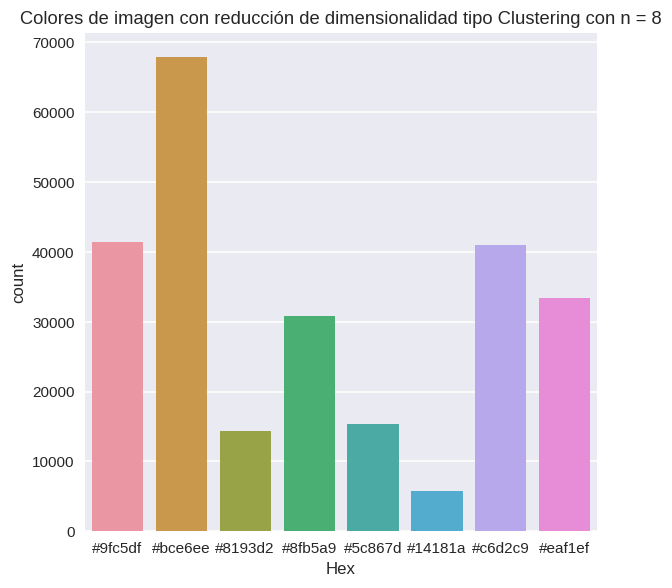

time: 368 ms (started: 2021-09-19 18:39:44 +00:00)


In [ ]:
ax = sns.countplot(df_image_1["Hex"])

#data = centroid_model, 
#x = centroid_model["Hex"]
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (6, 6) #escalar gráficos
plt.rcParams["figure.dpi"] = 110 #DPI gráficos
plt.title("Colores de imagen con reducción de dimensionalidad tipo Clustering con n = 8")

##*Notas*

Fuentes:
1. <code>https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html</code>
2. <code>https://upcommons.upc.edu/bitstream/handle/2117/23414/R13-8.pdf</code>

#### <div class="pull-right" style="color:blue"> **por Jesica Olivares y Daniel Zúñiga**</div>


<span style = "color : red", fkjhdfdfkljhfjkfd>